In [2]:
#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#load data
data = pd.read_csv("data.csv")

In [4]:
#to know the number of cases and the number of variables
data.shape

(569, 32)

In [5]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print "There are "+ str(len(data))+" cases in this dataset"
print "There are {}".format(features)+" features in this dataset"
print "There are {}".format(malignant)+" cases diagnosed as malignant tumor"
print "There are {}".format(benign)+" cases diagnosed as benign tumor"
print "The percentage of malignant cases is: {:.4f}%".format(rate)

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


In [6]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
#make diagnosis column numerical
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head(2)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302          1        17.99         10.38           122.8     1001.0   
1  842517          1        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33            184.6   
1           ...                    24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  

[2 rows x 32 columns]

In [8]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(1)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            184.6      2019.0            0.1622             0.6656   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   

   fractal_dimension_worst  
0                   0.1189  

[1 rows x 31 columns]

In [10]:
# Extract feature columns where everything but the diagnosis is included.
# I am separating all the features that are helpful in determining the diagnosis
features = list(data.columns[1:30])
print features

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [12]:
#Our target is predicting the diagnosis in benign or malignant, so we need
#to extract this one as the dependent variable - the variable we will predict
target = data.columns[0:1]
print target

Index([u'diagnosis'], dtype='object')


In [13]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [14]:
# X should have 29 variables and 569 cases
X.shape

(569, 29)

In [15]:
# Y should have 1 variable - just the diagnosis and 569 cases
Y.shape

(569, 1)

In [17]:
# Show the feature information by printing the first row
# Show the traget information by also printing the first row
print "\nFeature values:"
print X.head(1)
print "\nTarget values:"
print Y.head(1)


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean       ...        fractal_dimension_se  radius_worst  \
0                 0.07871       ...                    0.006193         25.38   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0             0.6656           0.7119                0.2654          0.4601  

[1 rows x 29 columns]

Target values:
   diagnosis
0          1


In [28]:
#Getting the highest correlations available, so we can remove highly correlated variables
def top_correlations(df, n='a'):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations")
print(get_top_abs_correlations(df, 50))

Top Correlations
radius_mean          perimeter_mean          0.997855
radius_worst         perimeter_worst         0.993708
radius_mean          area_mean               0.987357
perimeter_mean       area_mean               0.986507
radius_worst         area_worst              0.984015
perimeter_worst      area_worst              0.977578
radius_se            perimeter_se            0.972794
perimeter_mean       perimeter_worst         0.970387
radius_mean          radius_worst            0.969539
perimeter_mean       radius_worst            0.969476
radius_mean          perimeter_worst         0.965137
area_mean            radius_worst            0.962746
                     area_worst              0.959213
                     perimeter_worst         0.959120
radius_se            area_se                 0.951830
perimeter_mean       area_worst              0.941550
radius_mean          area_worst              0.941082
perimeter_se         area_se                 0.937655
concavity_m

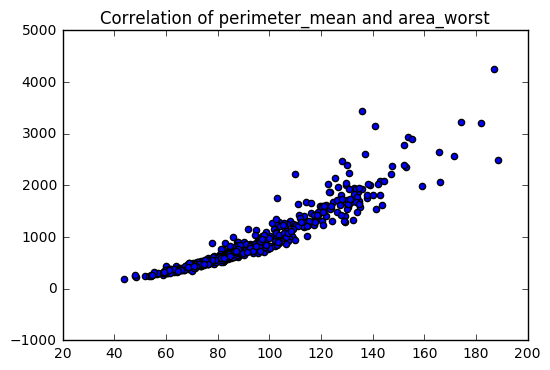

In [34]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe 
#I identify them which ones there are and let PCA to do its job.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of perimeter_mean and area_worst')
fig.savefig('scatter.png')